In [7]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np


path = "../data/cleanData/normalizedFullData.csv"
path2 = "../data/cleanData/fullData.csv"

In [8]:
df = pd.read_csv(path2, index_col=False)
df2 = df.rename(columns = {'Unnamed: 0':'County Name'})
df3=df2.fillna(0)
df3.head()

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0


In [9]:
dfTrimed = df3.drop(['Persons under 5 years'], axis=1)
dfTrimed.head()

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
1,"Allen County, Ohio",101670,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
2,"Ashland County, Ohio",52316,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0


# Scaling

In [20]:
# Scaling numerical columns so that they do not dominate.

df_scaled = df3.iloc[:, 1:-1]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df3.iloc[:, 1:-1].columns
df_scaled.head()

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,-0.483125,-0.447412,-0.470140,-0.519097,-0.477279,-0.555122,-0.298633,-0.361370,-0.336760,-0.443469,...,-0.611599,2.859044,-1.299905,-1.256369,-0.377214,-0.466494,-0.426027,-0.384019,-0.518448,1.348417
1,-0.146288,-0.116788,-0.123544,-0.148065,-0.157249,-0.166313,-0.081841,-0.148925,-0.256107,-0.443469,...,0.781452,-1.338013,-0.427729,-0.476045,-0.067375,-0.103306,-0.075990,-0.107990,-0.090283,-0.696448
2,-0.370552,-0.355427,-0.367705,-0.377799,-0.364848,-0.393802,-0.293436,-0.373987,-0.304214,-0.183195,...,-0.617740,-0.149690,-0.177553,-0.415425,-0.362336,-0.342502,-0.307773,-0.302899,-0.359232,-0.465933
3,-0.165977,-0.165662,-0.168057,-0.121405,-0.176084,-0.124667,-0.236881,-0.020722,-0.297611,0.040764,...,-0.418148,0.254846,-0.872869,-0.833725,-0.075566,-0.195011,-0.253848,-0.270554,-0.328175,2.681437
4,-0.326294,-0.403119,-0.422357,-0.414535,-0.324509,-0.352008,-0.270836,-0.235250,-0.176410,-0.134741,...,-0.266253,-0.731210,-1.087411,-1.171199,-0.144784,-0.343458,-0.350783,-0.338162,-0.359232,0.443611


# Creating Model with scaled dataset

## Elbow Curve

In [41]:
# K-Means Clustering Method
# Creating first model with random cluster number which is 3 and fitting last dataframe.
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df_scaled)

print(f"The silhouette score of this model is about: {round(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'),2)}")
# n_clusters: give cluster number in the model.
# cluster_centers_: give center of each clusters.
# labels_: give labels of each point.
# inertia_: give sum of squared distances (SSD) of samples to their closest cluster center.
# Visualizing of model.


/Users/noorashrifeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The silhouette score of this model is about: 0.43


In [42]:
new_df = df3.iloc[:, 1:-1]
pred = kmeans.predict(df_scaled)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,2
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,2
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,2
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,2
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,0.00,...,20.7,66337,36047,14439.45,2701,57707,2719738,214.3,617.16,1
84,64971,3963.23,15852.92,8446.23,33460.06,58214.02,1754.22,129.94,3703.35,0.00,...,25.9,96634,44442,3573.40,1083,25265,1591247,145.4,431.76,1
85,21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,0.00,...,22.9,61626,30596,1714.93,494,9495,425207,53.8,406.88,2
86,537633,29032.18,111827.66,101612.64,275805.73,415590.31,82257.85,1075.27,23118.22,0.00,...,23.3,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79,0


In [43]:
frame['Banned or not'] = df3.iloc[:,-1]
frame

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster,Banned or not
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,44467,24539,5205.44,385,4572,167427,47.1,583.87,2,0.0
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,2,1.0
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,58168,28992,5702.44,1034,18234,701075,124.0,422.99,2,0.0
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,49680,26777,15281.91,1806,24464,913850,139.0,702.07,2,0.0
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,47061,24990,12969.70,1029,13265,469095,124.0,503.64,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,0.00,...,66337,36047,14439.45,2701,57707,2719738,214.3,617.16,1,0.0
84,64971,3963.23,15852.92,8446.23,33460.06,58214.02,1754.22,129.94,3703.35,0.00,...,96634,44442,3573.40,1083,25265,1591247,145.4,431.76,1,1.0
85,21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,0.00,...,61626,30596,1714.93,494,9495,425207,53.8,406.88,2,0.0
86,537633,29032.18,111827.66,101612.64,275805.73,415590.31,82257.85,1075.27,23118.22,0.00,...,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79,0,0.0


In [44]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,0,4.869237e+05,28444.388571,108556.024286,86041.791429,249298.034286,370860.482857,86171.327143,1490.364286,13391.472857,...,22.985714,61250.142857,34399.285714,69506.985714,10717.000000,220029.428571,1.156604e+07,1131.242857,450.220000,0.142857
1,1,1.616695e+05,8598.633846,35761.560000,28003.125385,81107.419231,145163.069231,7120.373846,393.455385,5470.985385,...,25.546154,81093.153846,39720.230769,13180.150000,3194.307692,53210.461538,2.552820e+06,384.769231,457.743846,0.153846
2,2,5.604617e+04,3148.298939,12370.476818,11025.566212,27975.927273,51792.496212,2431.354394,184.887727,402.602424,...,24.886364,56143.196970,28997.954545,7843.755152,1076.060606,17501.257576,7.164205e+05,121.318182,466.166212,0.106061
3,3,1.285400e+06,77340.110000,282631.590000,202601.555000,661140.485000,829551.495000,351744.030000,3856.200000,60845.985000,...,23.100000,60554.000000,36926.500000,195681.445000,30593.500000,673299.000000,3.780571e+07,2626.400000,494.815000,0.000000


In [45]:
# count number of banned counties in each cluster
frame.cluster.value_counts(ascending=True)


3     2
0     7
1    13
2    66
Name: cluster, dtype: int64

In [46]:
groupeddf = frame.groupby('cluster')['Banned or not'].value_counts(ascending=True)
groupeddf

cluster  Banned or not
0        1.0               1
         0.0               6
1        1.0               2
         0.0              11
2        1.0               7
         0.0              59
3        0.0               2
Name: Banned or not, dtype: int64

In [47]:
# clusters = k_fit.labels_
# centers = k_fit.cluster_centers_
# df_scaled['clusters'] = clusters

# df_scaled.head()

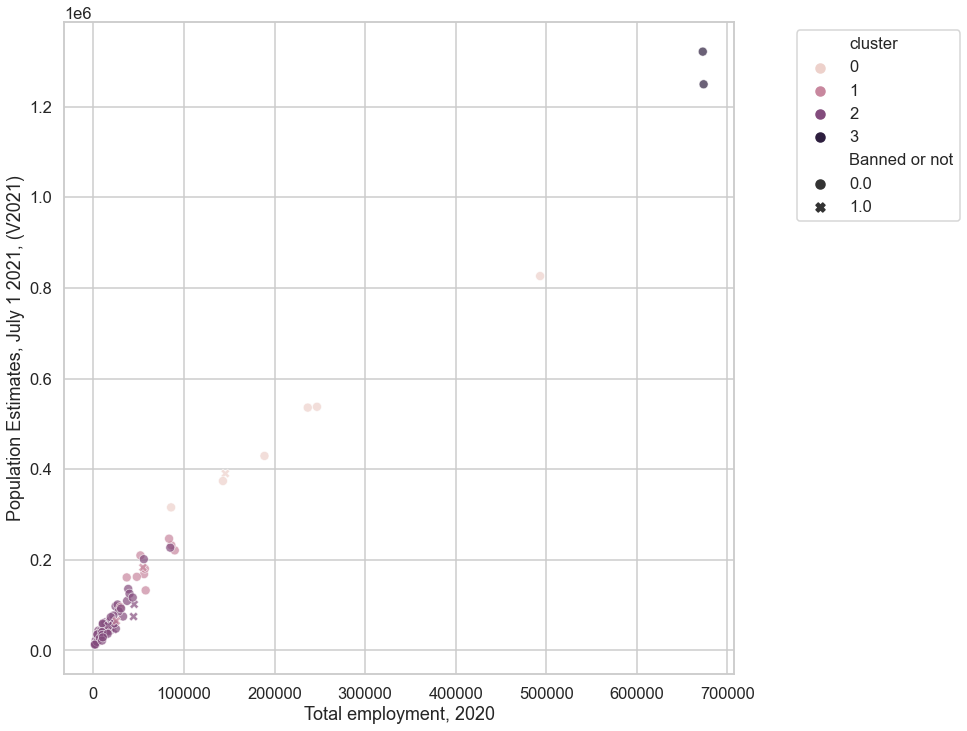

''

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
frame['c'] = frame.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Set style and context
sns.set(style='whitegrid', context='talk', palette='rainbow')

# Set figure size
plt.figure(figsize=(12, 12))

# Create scatterplot
scatterplot = sns.scatterplot(data=frame, x=frame.iloc[:, -7], y=frame.iloc[:, 0], 
                              alpha=0.7, hue='cluster', style='Banned or not')

# for cluster_label in frame['cluster'].unique():
#     cluster_points = frame.loc[frame['cluster'] == cluster_label, ['Persons under 5 years', 'Population Estimates, July 1 2021, (V2021)']].values
#     if len(cluster_points) >= 3:  # check if there are at least 3 points
#         hull = ConvexHull(cluster_points)
#         hull_pts = cluster_points[hull.vertices, :]
#         hull_pts = np.vstack((hull_pts, hull_pts[0, :]))
#         plt.plot(hull_pts[:, 1], hull_pts[:, 0], linewidth=2)


# # Add convex hulls to the plot
# for cluster_label in frame['cluster'].unique():
#     cluster_points = frame.loc[frame['cluster'] == cluster_label, ['Persons under 5 years', 'Population Estimates, July 1 2021, (V2021)']].values
#     hull = ConvexHull(cluster_points)
#     hull_pts = cluster_points[hull.vertices, :]
#     hull_pts = np.vstack((hull_pts, hull_pts[0, :]))
#     plt.plot(hull_pts[:, 1], hull_pts[:, 0], linewidth=2)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

# Show plot
plt.show()
plt.savefig("cluster.jpg") #save as jpg
;


In [59]:
for cluster_label in frame['cluster'].unique():
    cluster_points = frame.loc[frame['cluster'] == cluster_label, ['Persons under 5 years', 'Population Estimates, July 1 2021, (V2021)']].values
    if len(cluster_points) >= 3:  # check if there are at least 3 points
        hull = ConvexHull(cluster_points)
        hull_pts = cluster_points[hull.vertices, :]
        hull_pts = np.vstack((hull_pts, hull_pts[0, :]))
        #plt.plot(hull_pts[:, 1], hull_pts[:, 0], linewidth=2)


In [71]:
print(f"1{hull}, 2{hull_pts}, 3{hull_pts}")

1<scipy.spatial.qhull.ConvexHull object at 0x7ff2999b5bb0>, 2[[  7144.81 162382.  ]
 [  2263.69  44386.  ]
 [  3963.23  64971.  ]
 [ 10463.26 180401.  ]
 [ 12582.18 220740.  ]
 [ 13560.42 246553.  ]
 [ 11137.1  232023.  ]
 [  7144.81 162382.  ]], 3[[  7144.81 162382.  ]
 [  2263.69  44386.  ]
 [  3963.23  64971.  ]
 [ 10463.26 180401.  ]
 [ 12582.18 220740.  ]
 [ 13560.42 246553.  ]
 [ 11137.1  232023.  ]
 [  7144.81 162382.  ]]


- change y axis scale

In [26]:
plt.savefig("cluster.png") #save as jpg

<Figure size 432x288 with 0 Axes>

(0.0, 120000.0)

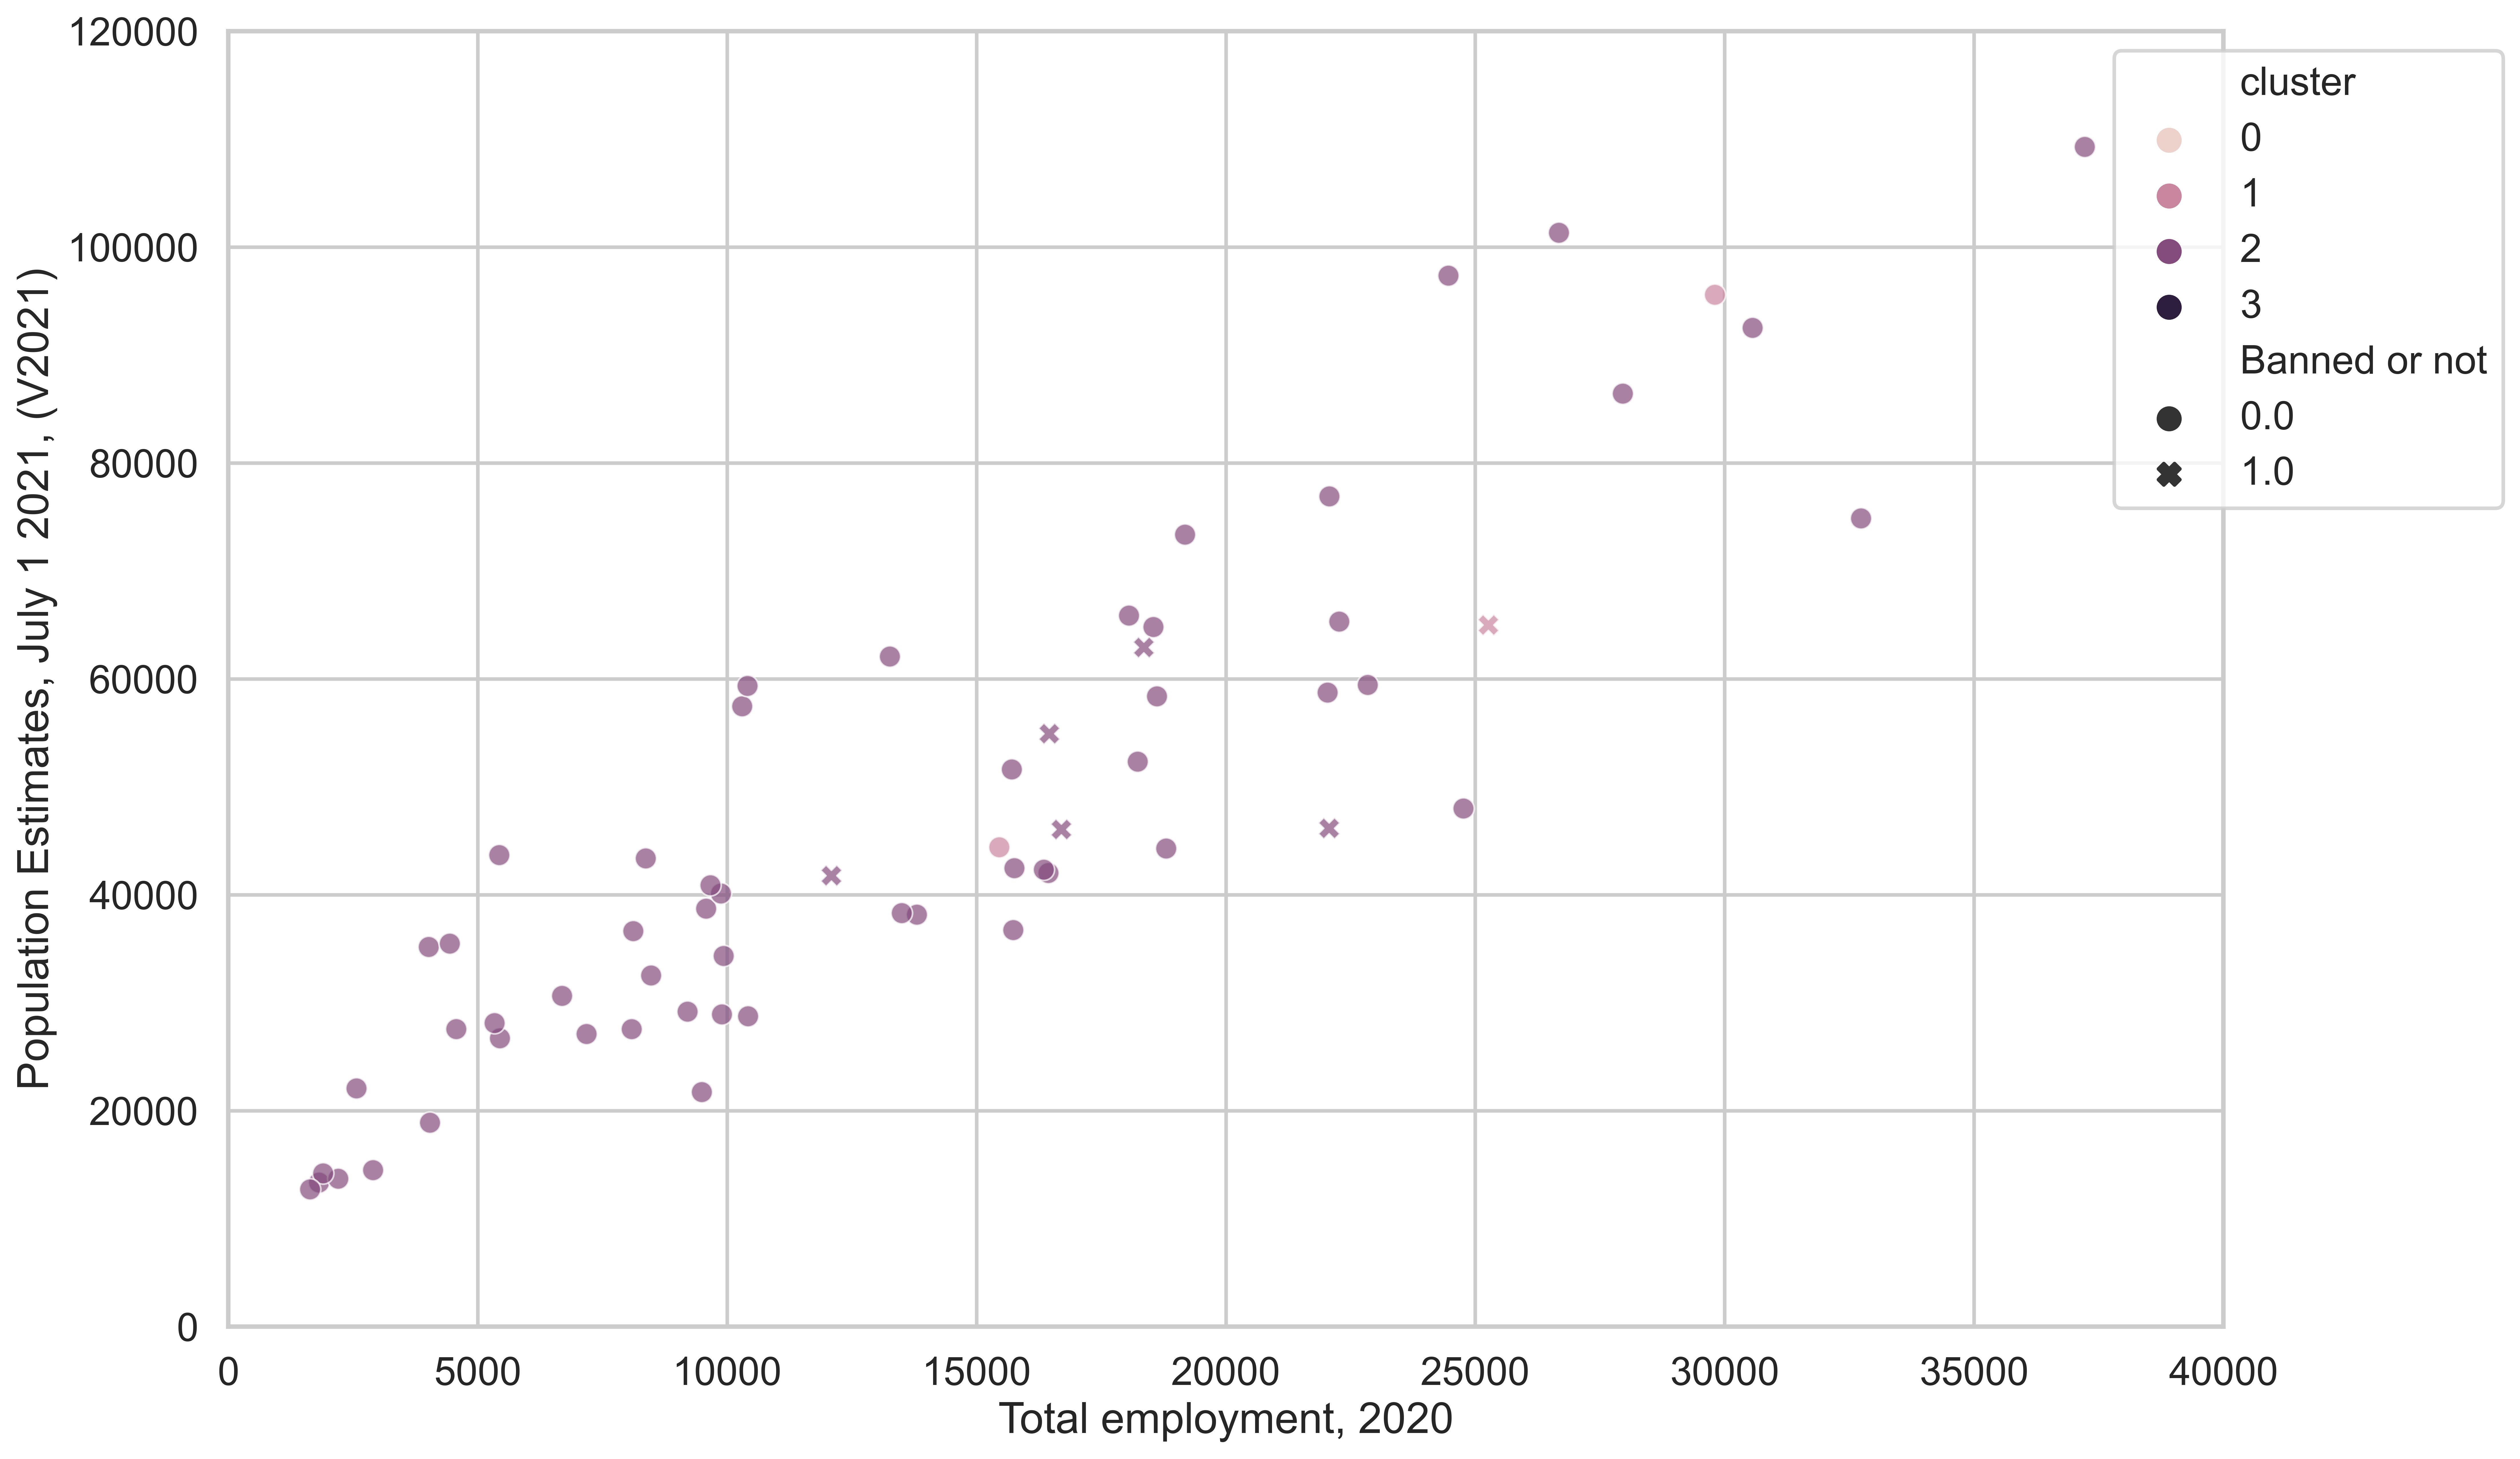

In [105]:
# Plot
sns.set(style='whitegrid', context='talk', palette='rainbow')
plt.figure(figsize=(15, 10),dpi = 600)

sns.scatterplot(data=frame, x=frame.iloc[:, -7], y=frame.iloc[:, 0], 
    alpha=0.7, hue='cluster', style='Banned or not')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1));

plt.xlim(0, 40000)
plt.ylim(0, 120000)
# loop through each cluster and plot a line that connects each point in that cluster
# for i in range(3):
#     sns.lineplot(df_scaled.iloc[clusters == i, 0], df_scaled.iloc[clusters == i, 1], color='red', alpha=0.3)
# ;

# sns.scatterplot(ax=axes[0, 1], data=df_scaled, x=df_scaled.iloc[:, 3], y=df_scaled.iloc[:, 5], 
#     alpha=0.7, hue='clusters', size='Banned or not')
# plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1));

# sns.scatterplot(ax=axes[1, 0], data=df_scaled, x=df_scaled.iloc[:, 6], y=df_scaled.iloc[:, 12], 
#     alpha=0.7, hue='clusters', size='Banned or not')
# plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1));

# sns.scatterplot(ax=axes[1, 1], data=df_scaled, x=df_scaled.iloc[:, 5], y=df_scaled.iloc[:, 9], 
#     alpha=0.7, hue='clusters', size='Banned or not')
# plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1));



#plt.savefig("cluster.jpg"); #save as jpg

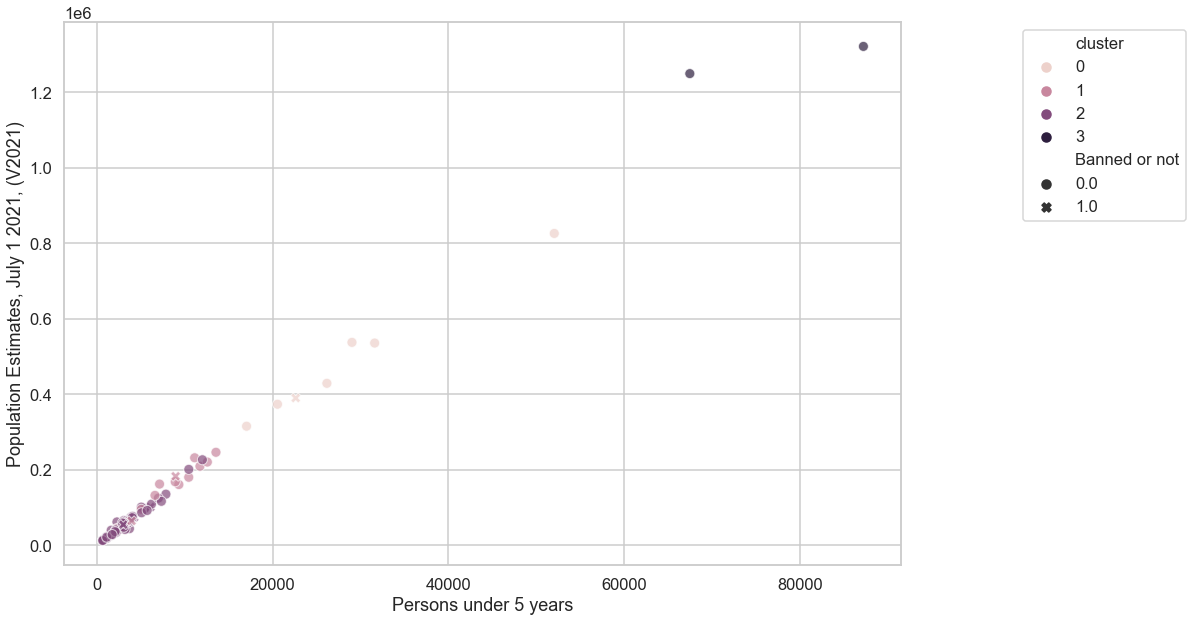

In [82]:
sns.set(style='whitegrid', context='talk', palette=sns.color_palette('dark', n_colors=4))

plt.figure(figsize=(15, 10))

sns.scatterplot(data=frame, x=frame.iloc[:, 1], y=frame.iloc[:, 0], 
    alpha=0.7, hue='cluster', style='Banned or not', s=100, linewidth=1)

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()


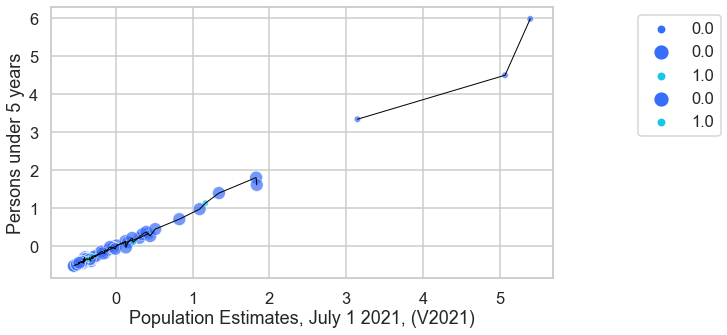

In [11]:
import numpy as np

# create a list of unique clusters
clusters = np.unique(df_scaled['clusters'])

# plot the scatterplot with lines connecting each point in each cluster
sns.set(style='whitegrid', context='talk', palette='rainbow')
plt.figure(figsize=(9, 5))
for c in clusters:
    points = df_scaled[df_scaled['clusters'] == c]
    sns.scatterplot(data=points, x=points.iloc[:, 0], y=points.iloc[:, 1], 
                    alpha=0.7, hue='Banned or not', size='Banned or not')
    sns.lineplot(data=points, x=points.iloc[:, 0], y=points.iloc[:, 1], color='black', lw=1)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))


IndexError: list index out of range

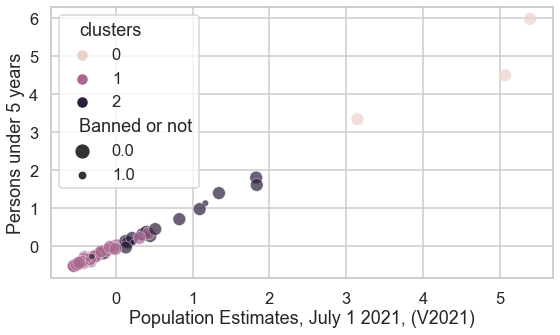

In [12]:
sns.set(style='whitegrid', context='talk', palette='rainbow')
plt.figure(figsize=(9, 5))

sns.scatterplot(data=df_scaled, x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], 
    alpha=0.7, hue='clusters', size='Banned or not')

# Get the legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create a dictionary to store the position of each label
label_pos = {}
for i, label in enumerate(labels):
    label_pos[label] = i
    
# Create a list of colors for the lines
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Draw lines connecting the labels of the same cluster
for i in range(len(labels)):
    label = labels[i]
    cluster = int(label.split()[1])
    pos = label_pos[label]
    for j in range(i+1, len(labels)):
        other_label = labels[j]
        other_cluster = int(other_label.split()[1])
        if cluster == other_cluster:
            other_pos = label_pos[other_label]
            plt.plot([pos, other_pos], [0, 0], color=colors[cluster], lw=2)
            
# Add legend
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.35, 1))

# Set x and y axis labels
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])


In [ ]:
for col in range(len(df_scaled.columns)):
    print(df_scaled.iloc[:, col])

In [ ]:
for col1 in range(len(df_scaled.columns)):
    for col2 in range(len(df_scaled.columns)):
        if col1!=col2:
            # print(df_scaled.iloc[:, col1], df_scaled.iloc[:, col2], [col1, col2])
            # print(col1,col2)

In [ ]:
df_scaled.iloc[:, 1]

In [ ]:
# Finding optimal cluster number by using Elbow method.
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df_scaled)
elbow.show()

In [ ]:
# Final Model with Optimum k cluster.
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df_scaled)

df_scaled.loc[:,'county'] = df3['County Name']

df_scaled['cluster'] = kmeans.labels_
df_scaled['cluster'] = df_scaled['cluster'] + 1
df_scaled['cluster'].unique()

# Inverse scaling for each numerical columns.
df_scaled.iloc[:, :-2] = scaler.inverse_transform(df_scaled.iloc[:, :-2])
final_df = df_scaled
final_df.head()

# Visualizing Clusters

In [ ]:
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(final_df.iloc[:, 0],
            final_df.iloc[:, 1],
            c=clusters,
            s=50,
            cmap="viridis")

plt.scatter(centers[:, 0],
            centers[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

In [ ]:
dfn = pd.read_csv(path)
dfn=dfn.drop(['Unnamed: 0'], axis=1)
dfn.head()

In [ ]:
plt.hist('Building permits, 2021', data=dfn[dfn['Banned or not']==1], alpha=0.5, label='Banned');
plt.hist('Building permits, 2021', data=dfn[dfn['Banned or not']==0], alpha=0.5, label='Banned');


In [ ]:


plt.hist('Persons per household, 2017-2021', data=dfn[dfn['Banned or not']==1], alpha=0.5, label='Banned');
plt.hist('Persons per household, 2017-2021', data=dfn[dfn['Banned or not']==0], alpha=0.5, label='Banned');
